# Hands-On Data Preprocessing in Python
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 11: Data Cleaning Level III
### **Missing Values**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:
import os
DIR = "C:\Coding\Masters\DataScience\Semana 5\Hands-On-Prep_Missing_Values"
os.chdir(DIR)

# Example of detecting missing values

In [21]:
air_df = pd.read_csv('Airdata.csv')
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43
...,...,...,...,...,...,...,...,...
8779,12/31/2020 19:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82
8780,12/31/2020 20:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31
8781,12/31/2020 21:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33
8782,12/31/2020 22:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70


In [22]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB


In [23]:
print('Number of missing values:')
air_df.isna().sum()

Number of missing values:


DateTime            0
Temperature         0
Humidity            0
Wind_Speed          0
Wind_Direction      0
NO2_Location_A    120
NO2_Location_B    580
NO2_Location_C    132
dtype: int64

# Diagnosis of missing values
## Diagnosing the missing values in NO2_Location_A
### Diagnosing the missing values based on Temperature

In [24]:
BM_MV = air_df.NO2_Location_A.isna()
MV_labels = ['With Missing Values','Without Missing Values']
BM_MV

0       False
1       False
2        True
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Name: NO2_Location_A, Length: 8784, dtype: bool

In [25]:
box_sr = pd.Series('',index = BM_MV.unique())
for poss in BM_MV.unique():
    BM = BM_MV == poss
    box_sr[poss] = air_df[BM].Temperature

In [26]:
# Temperature values corresponding to observations with NaN in air_df.NO2_Location_A
box_sr[True]

2        1.690529
7        1.700529
25       3.020529
71       7.530528
75       8.070529
          ...    
8375     4.910529
8494     7.610529
8575    12.250529
8586    15.790529
8714     4.420528
Name: Temperature, Length: 120, dtype: float64

In [27]:
# Temperature values corresponding to observations with NO NaN values in air_df.NO2_Location_A
box_sr[False]

0       2.180529
1       1.490529
3       1.430529
4       0.840529
5       1.160529
          ...   
8779    4.920528
8780    4.990529
8781    4.360529
8782    3.820528
8783    3.170529
Name: Temperature, Length: 8664, dtype: float64

([<matplotlib.axis.YTick at 0x15032e31610>,
 [Text(0, 1, 'With Missing Values'), Text(0, 2, 'Without Missing Values')])

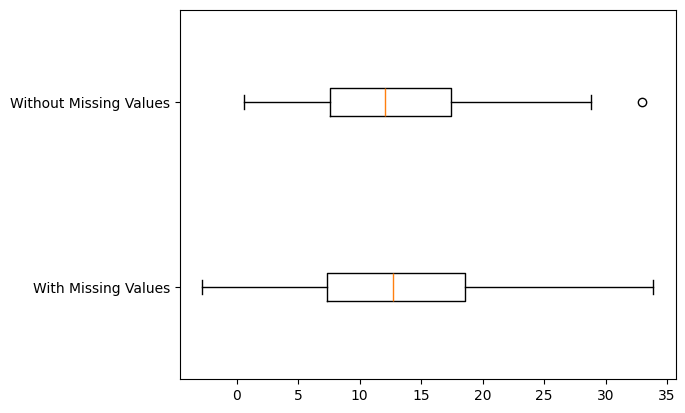

In [28]:
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

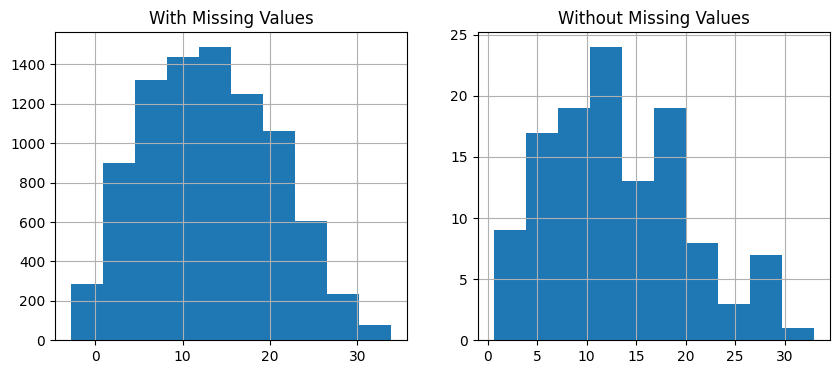

In [29]:
BM_MV = air_df.NO2_Location_A.isna()
temp_range = (air_df.Temperature.min(),air_df.Temperature.max())
MV_labels = ['With Missing Values','Without Missing Values']

plt.figure(figsize=(10,4))

for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    air_df[BM].Temperature.hist()
    plt.xlim = temp_range
    plt.title(MV_labels[i])

In [30]:
from scipy.stats import ttest_ind
BM_MV = air_df.NO2_Location_A.isna()
ttest_ind(air_df[BM_MV].Temperature, air_df[~BM_MV].Temperature)

TtestResult(statistic=np.float64(0.05646499065315542), pvalue=np.float64(0.9549726689684548), df=np.float64(8782.0))

In [31]:
ttest_ind(air_df[BM_MV].Temperature, air_df[~BM_MV].Temperature).pvalue

np.float64(0.9549726689684548)

### Diagnosing the missing values based on all the numerical attributes 

In [60]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}
    
    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())    
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])
   
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()
    
    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
    
    p_value = ttest_ind(group_1_data,group_2_data).pvalue
    
    print('p-value of t-test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Temperature:


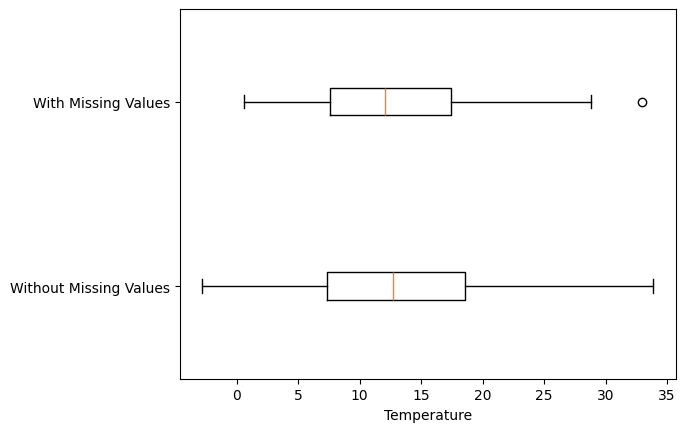

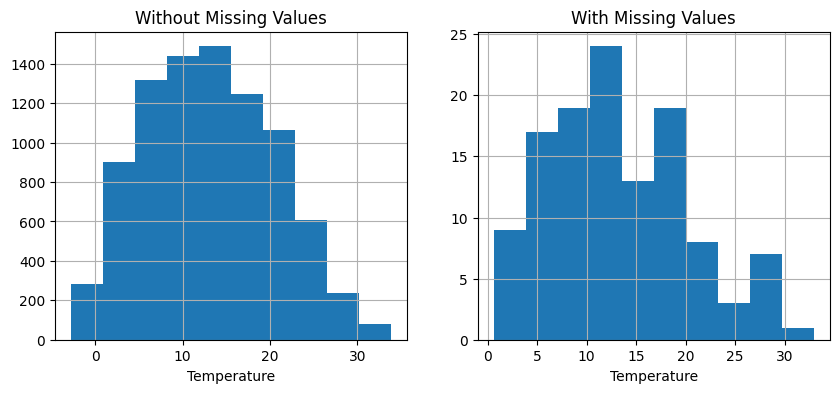

p-value of t-test: 0.9549726689684548
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


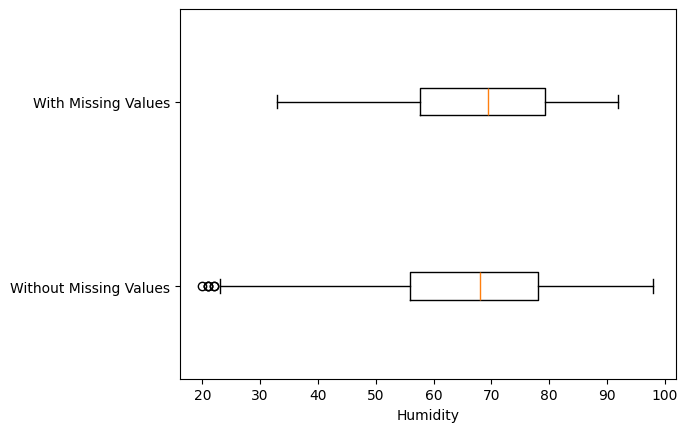

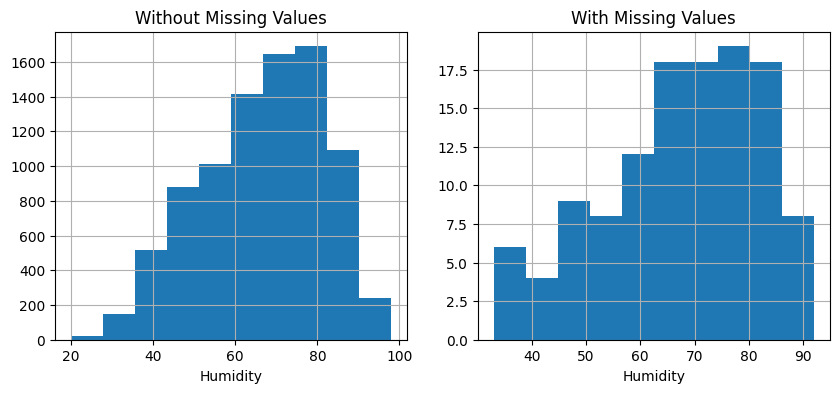

p-value of t-test: 0.5593319830352679
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


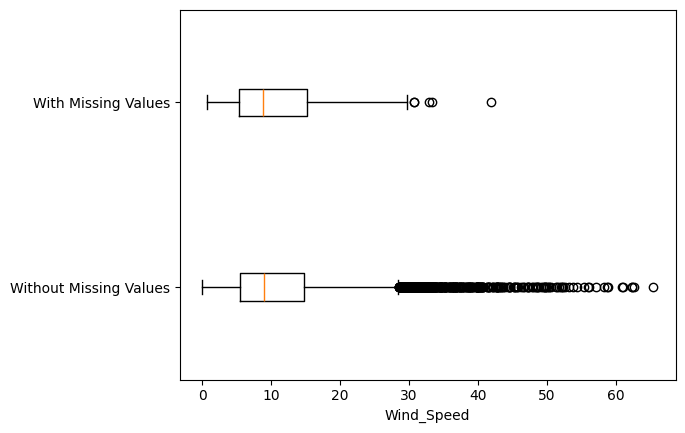

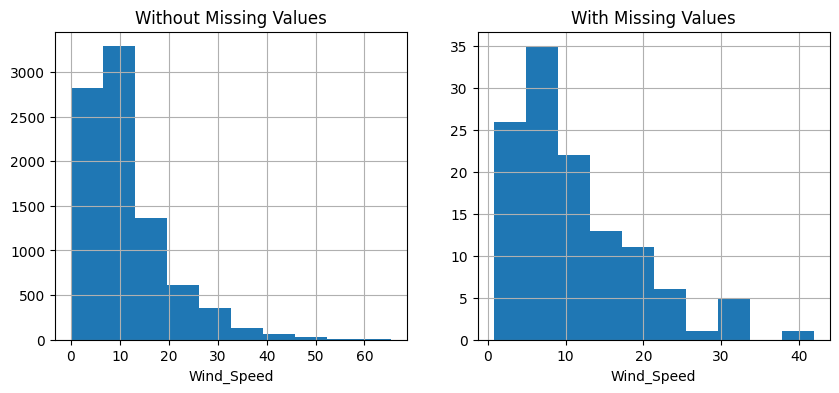

p-value of t-test: 0.8172472856083665
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


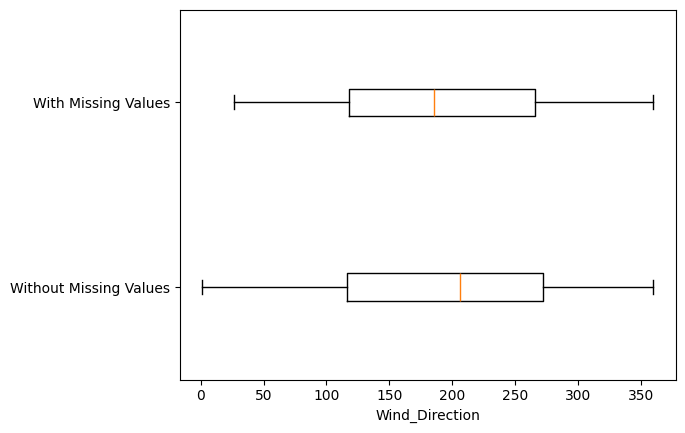

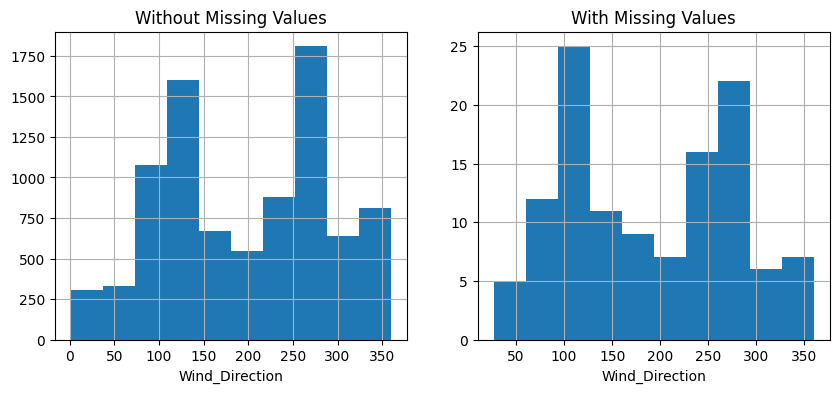

p-value of t-test: 0.39869195396670654
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [61]:
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_A.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

### Diagnosing the missing values based on weekday

In [34]:
air_df.DateTime = pd.to_datetime(air_df.DateTime)
air_df['month'] = air_df.DateTime.dt.month
air_df['day'] = air_df.DateTime.dt.day
air_df['hour'] = air_df.DateTime.dt.hour
air_df['weekday'] = air_df.DateTime.dt.day_name()

In [35]:
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


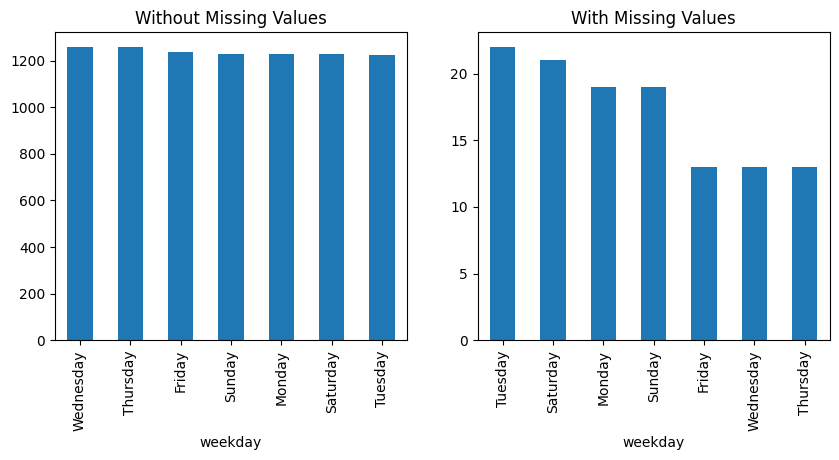

In [36]:
BM_MV = air_df.NO2_Location_A.isna()
MV_labels = ['Without Missing Values','With Missing Values']

plt.figure(figsize=(10,4))
for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    air_df[BM].weekday.value_counts().plot.bar()
    plt.title(MV_labels[i])
plt.show()

In [37]:
from scipy.stats import chi2_contingency
BM_MV = air_df.NO2_Location_A.isna()
contigency_table = pd.crosstab(BM_MV,air_df.weekday)
contigency_table

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
NO2_Location_A,,,,,,,
False,1235,1229,1227,1229,1259,1226,1259
True,13,19,21,19,13,22,13


In [38]:
chi2_contingency(contigency_table)

Chi2ContingencyResult(statistic=np.float64(6.048964133655503), pvalue=np.float64(0.41772751510388023), dof=6, expected_freq=array([[1230.95081967, 1230.95081967, 1230.95081967, 1230.95081967,
        1254.62295082, 1230.95081967, 1254.62295082],
       [  17.04918033,   17.04918033,   17.04918033,   17.04918033,
          17.37704918,   17.04918033,   17.37704918]]))

#### Diagnosing the missing values based on all the categorical attributes 

In [39]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for month:


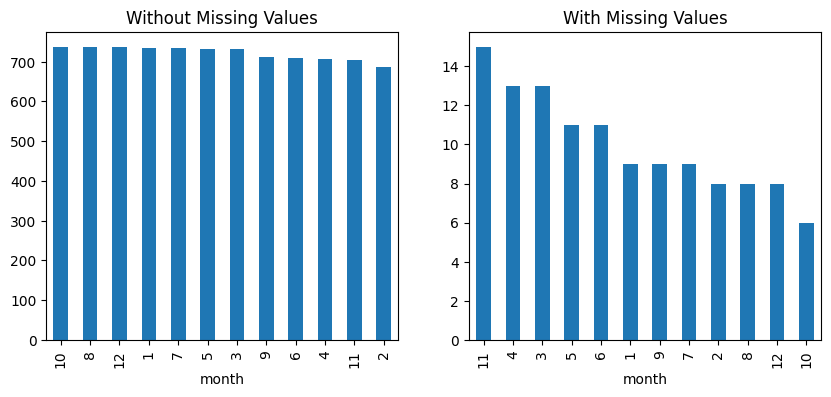

p-value of Chi_squared test: 0.709656583292986
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


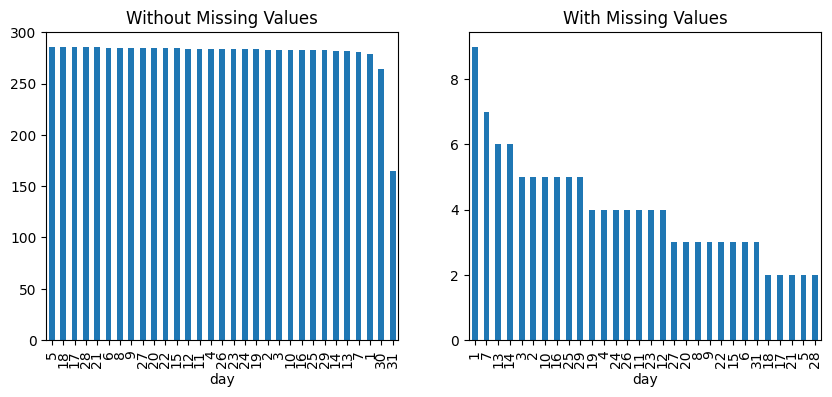

p-value of Chi_squared test: 0.8040640724986007
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


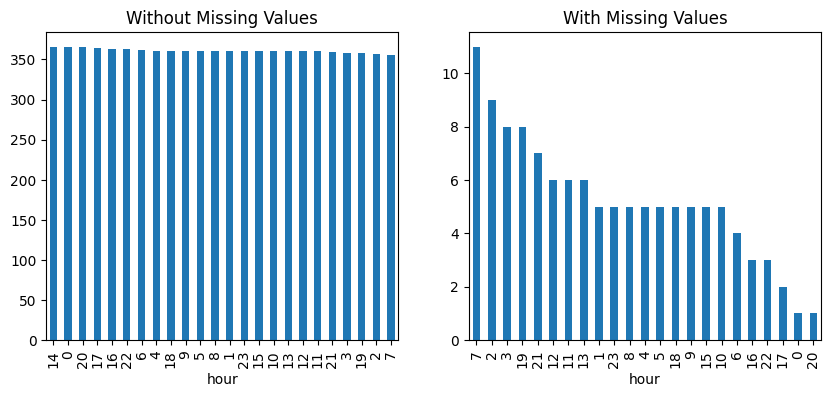

p-value of Chi_squared test: 0.12725321642668141
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


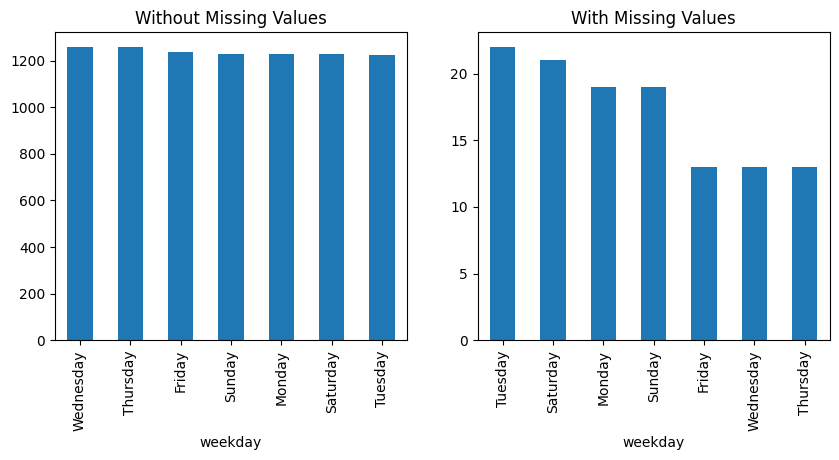

p-value of Chi_squared test: 0.41772751510388023
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [40]:
categorical_attributes = ['month', 'day','hour', 'weekday']

BM_MV = air_df.NO2_Location_A.isna()
for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

## Diagnosing the missing values in NO2_Location_B

Diagnosis Analysis of Missing Values for Temperature:


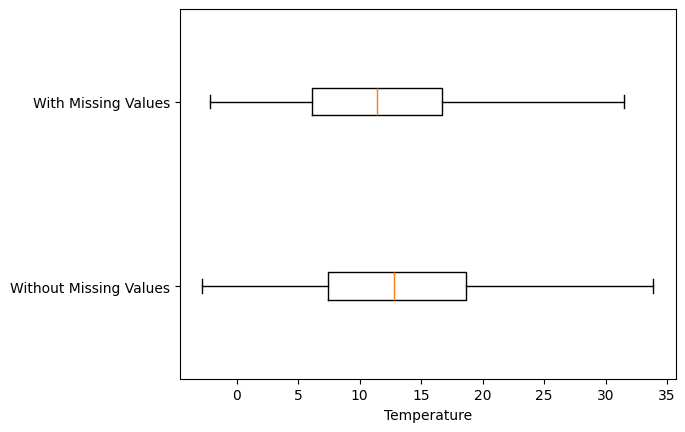

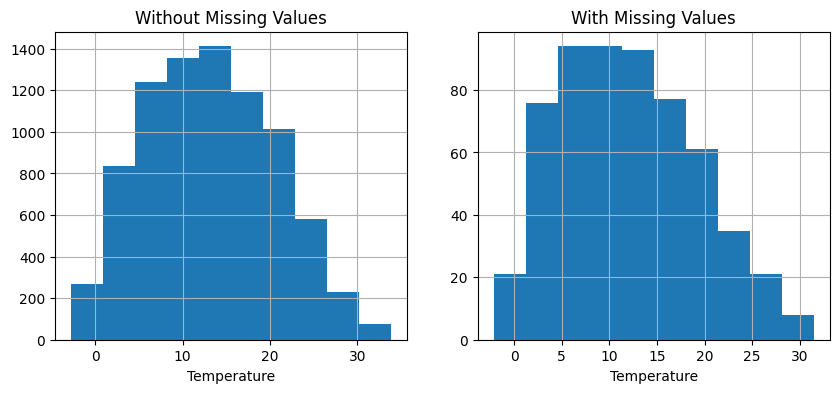

p-value of t-test: 0.00018958810621204928
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


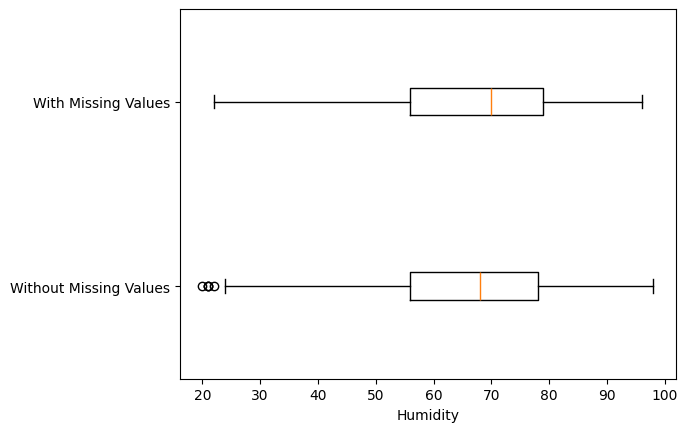

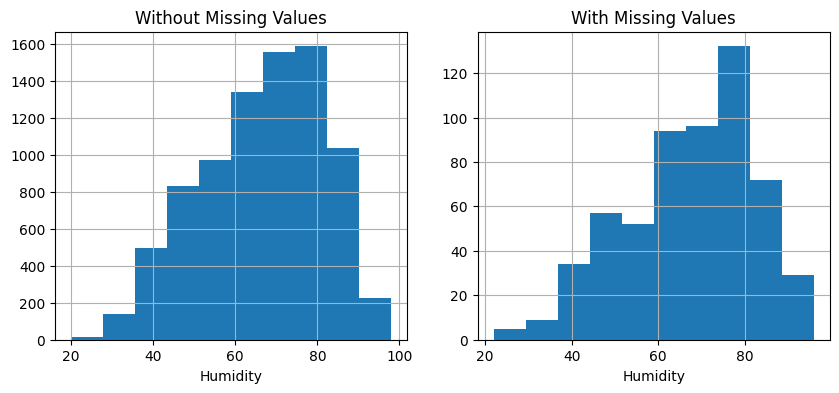

p-value of t-test: 0.43891454332709956
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


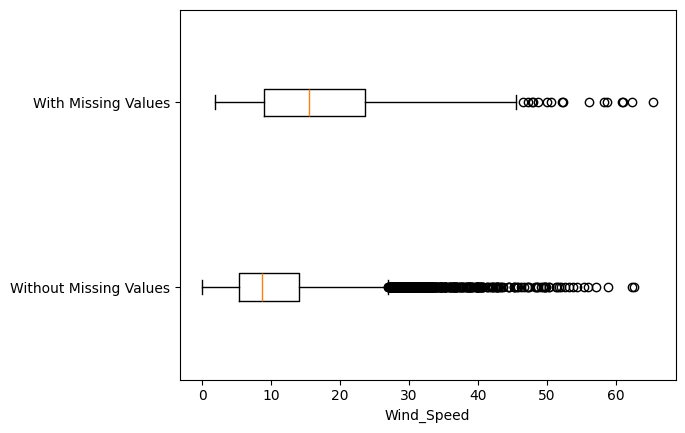

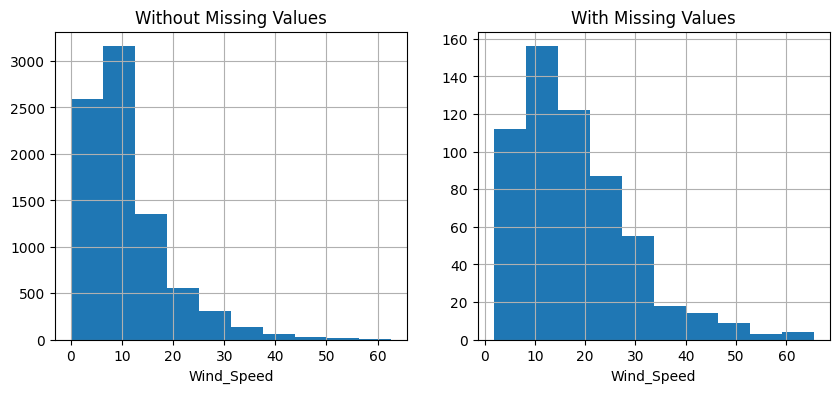

p-value of t-test: 1.3126894108159327e-85
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


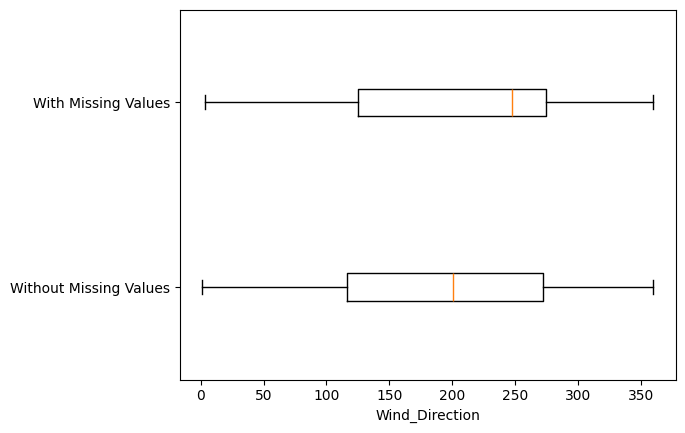

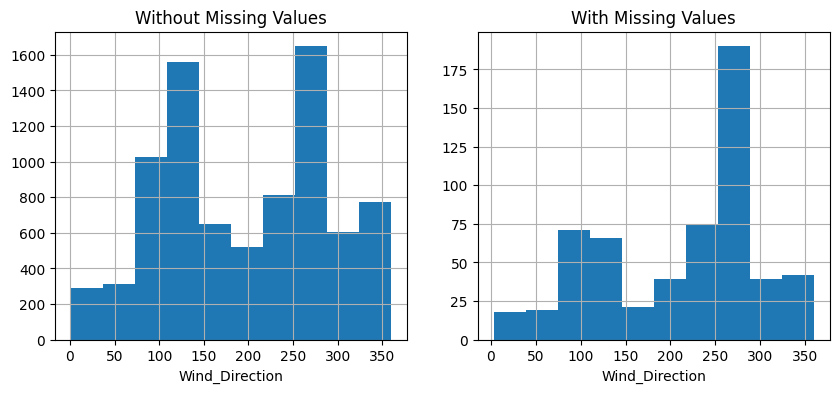

p-value of t-test: 5.8398056632254833e-05
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for month:


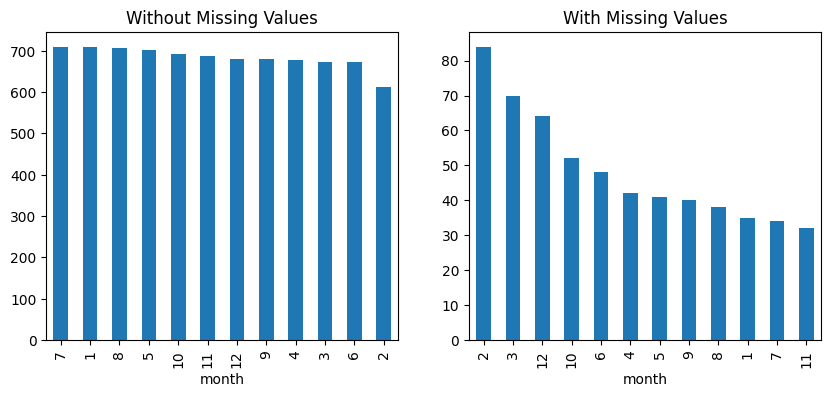

p-value of Chi_squared test: 1.8048364819875927e-10
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


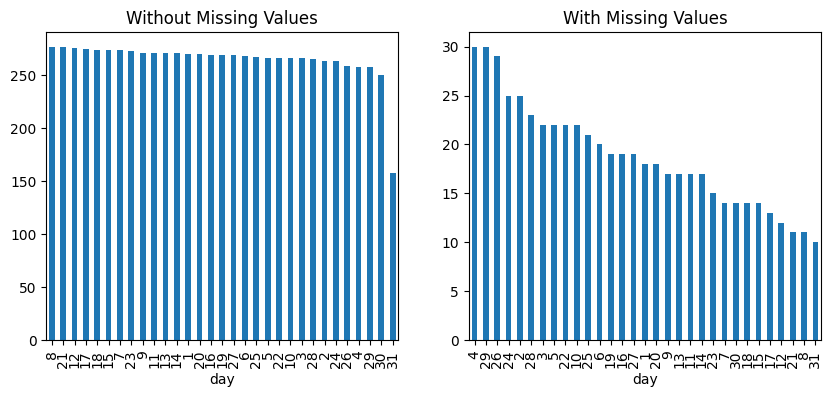

p-value of Chi_squared test: 0.03481669141156423
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


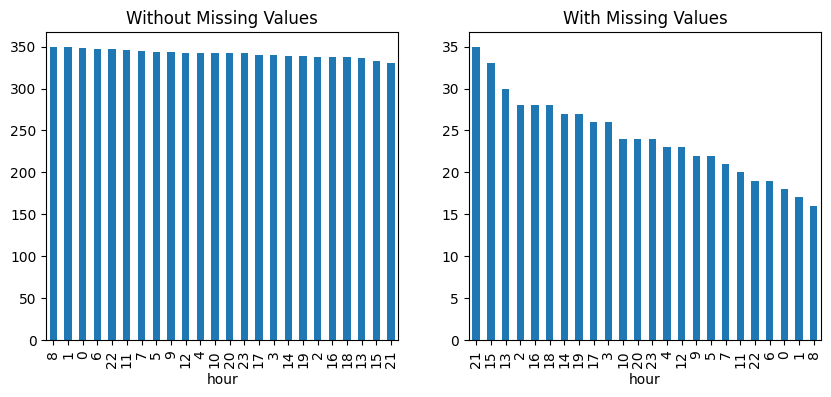

p-value of Chi_squared test: 0.3949474320151338
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


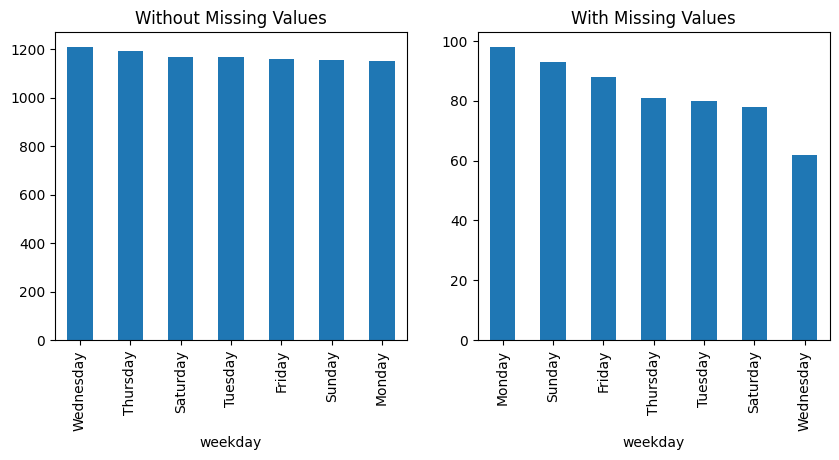

p-value of Chi_squared test: 0.07073083108612685
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [41]:
categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_B.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

## Diagnosing the missing values in NO2_Location_C

Diagnosis Analysis for Temperature:


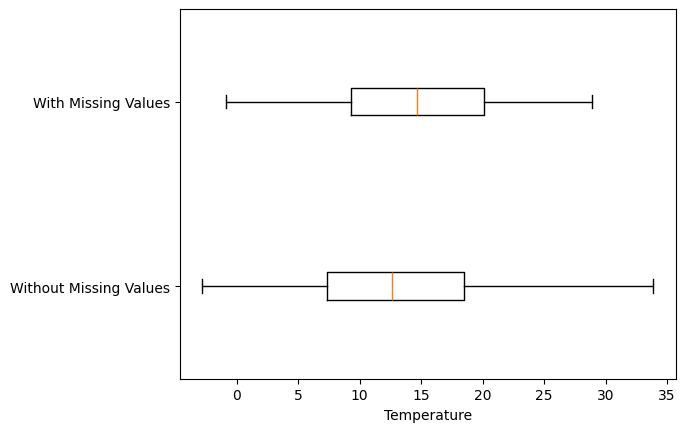

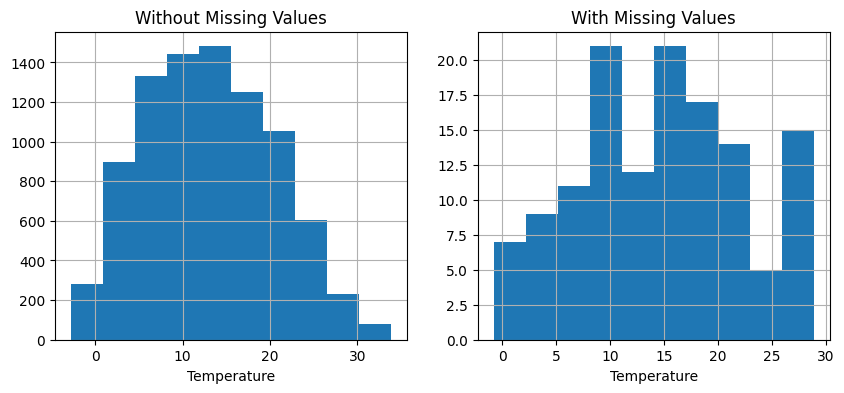

p-value of t-test: 0.01981913552818646
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for Humidity:


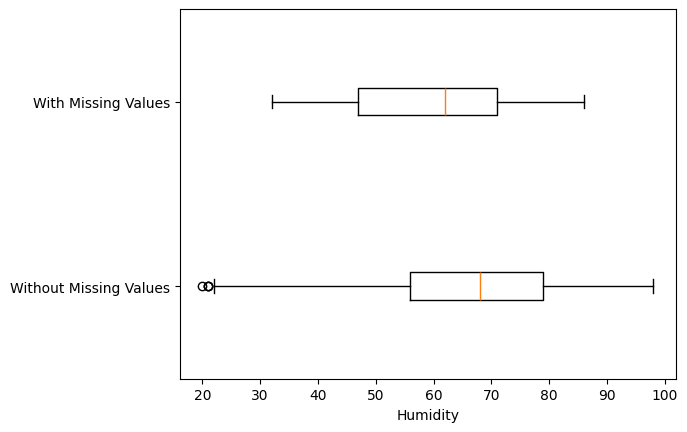

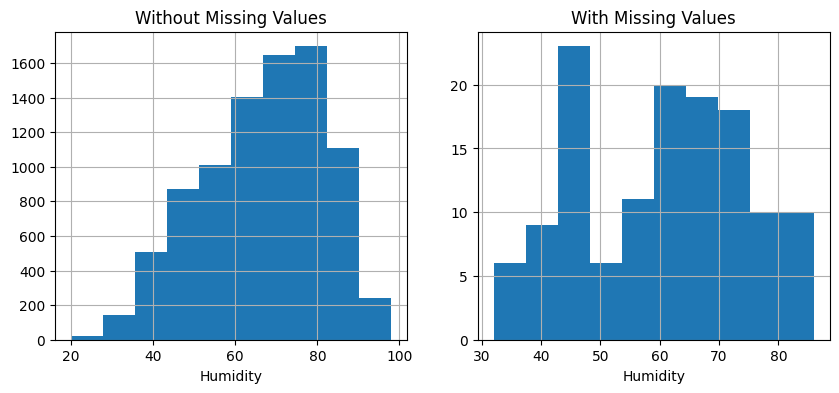

p-value of t-test: 8.179400599849167e-07
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for Wind_Speed:


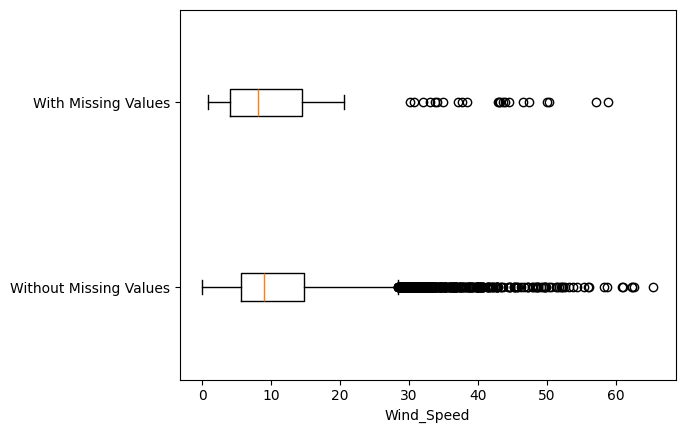

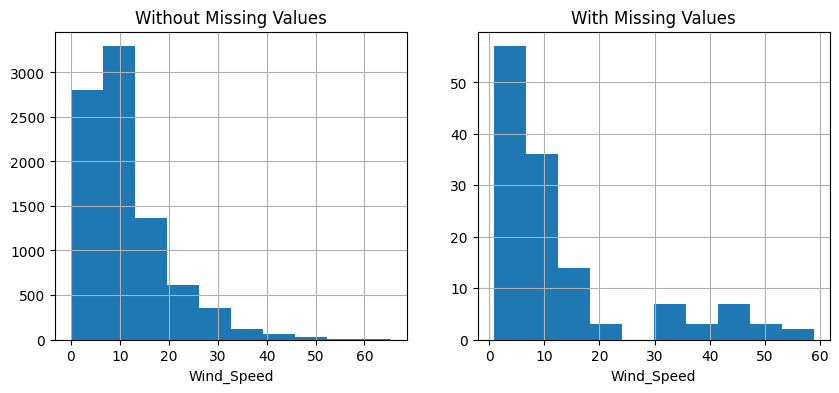

p-value of t-test: 0.013597962538292619
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for Wind_Direction:


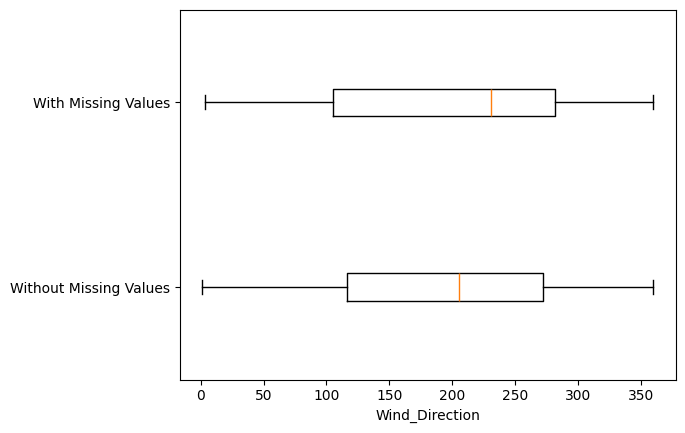

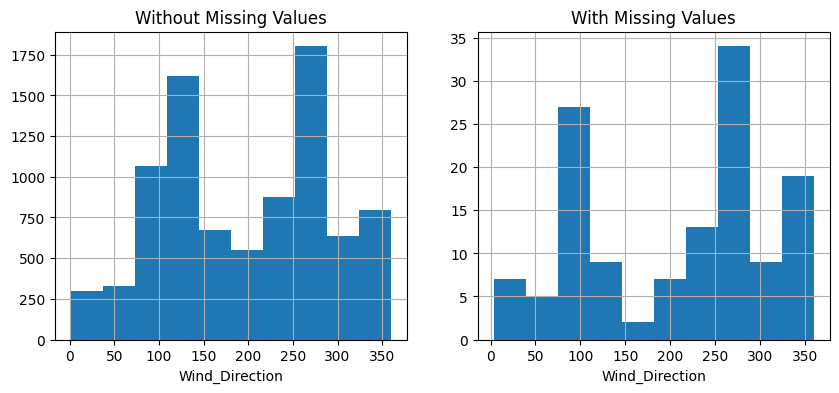

p-value of t-test: 0.3083081973623661
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for month:


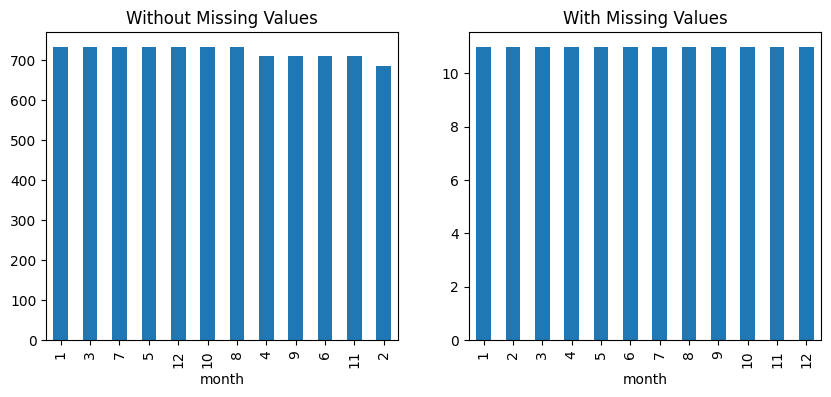

p-value of Chi_squared test: 0.9999999999839941
- - - - - - - - - divider - - - - - - - - - 
Diagnosis Analysis for day:


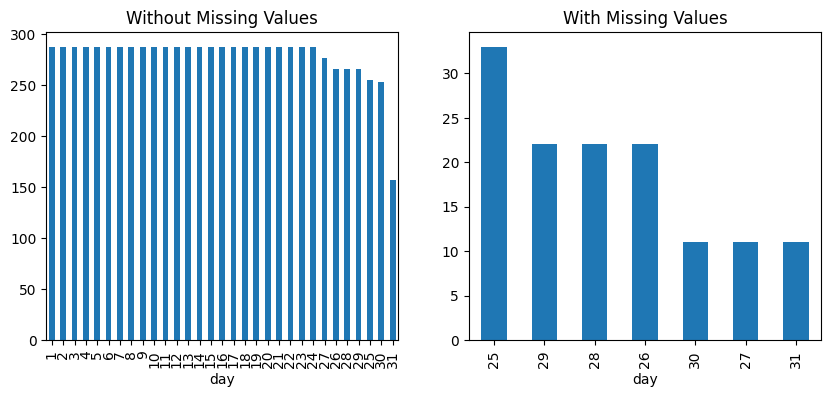

p-value of Chi_squared test: 4.5607973056357013e-101
- - - - - - - - - divider - - - - - - - - - 
Diagnosis Analysis for hour:


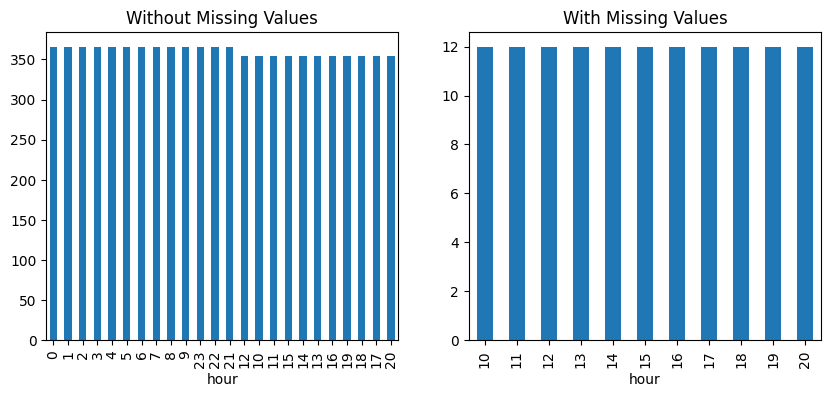

p-value of Chi_squared test: 3.3850851028854862e-22
- - - - - - - - - divider - - - - - - - - - 
Diagnosis Analysis for weekday:


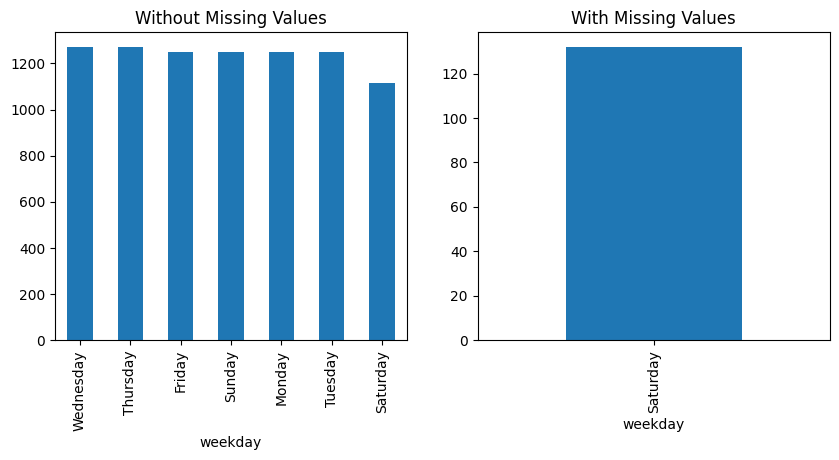

p-value of Chi_squared test: 1.554165460861991e-171
- - - - - - - - - divider - - - - - - - - - 


In [42]:
categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity',
                        'Wind_Speed', 'Wind_Direction']
BM_MV = air_df.NO2_Location_C.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

# Dealing with missing values
## Example 1 

In [43]:
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


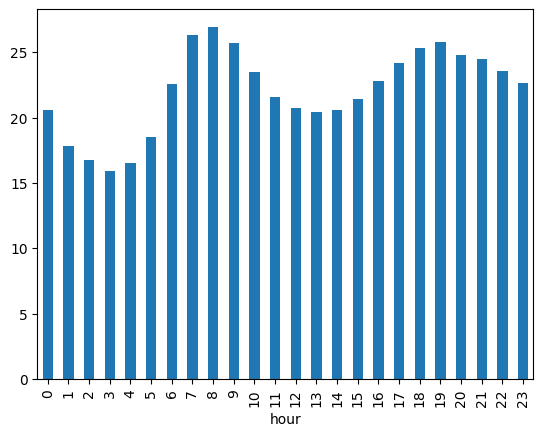

In [44]:
air_df.groupby('hour').NO2_Location_A.mean().plot.bar()
plt.show()

## Example 2 

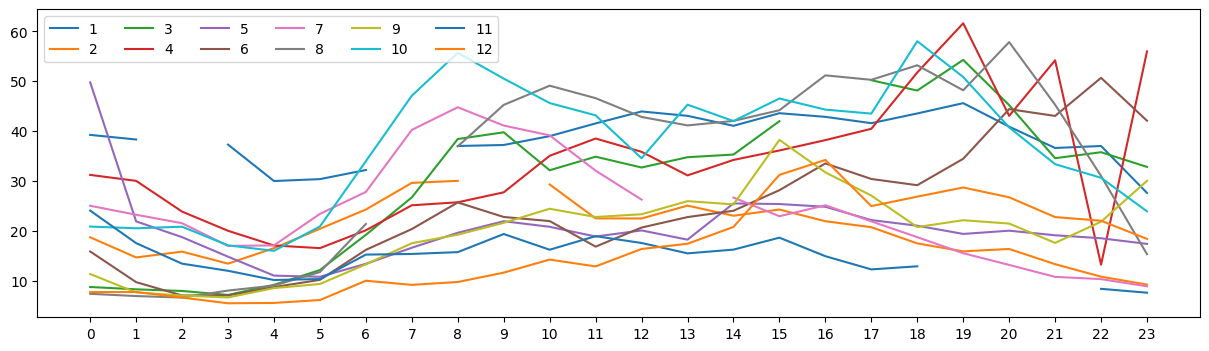

In [45]:
month_poss = air_df.month.unique()
hour_poss = air_df.hour.unique()
plt.figure(figsize=(15,4))

for mn in month_poss:
    BM = (air_df.month == mn) & (air_df.day ==1)
    wdf = air_df[BM]
    plt.plot(wdf.NO2_Location_A.values,
             label=mn)
plt.legend(ncol=6)
plt.xticks(hour_poss)
plt.show()

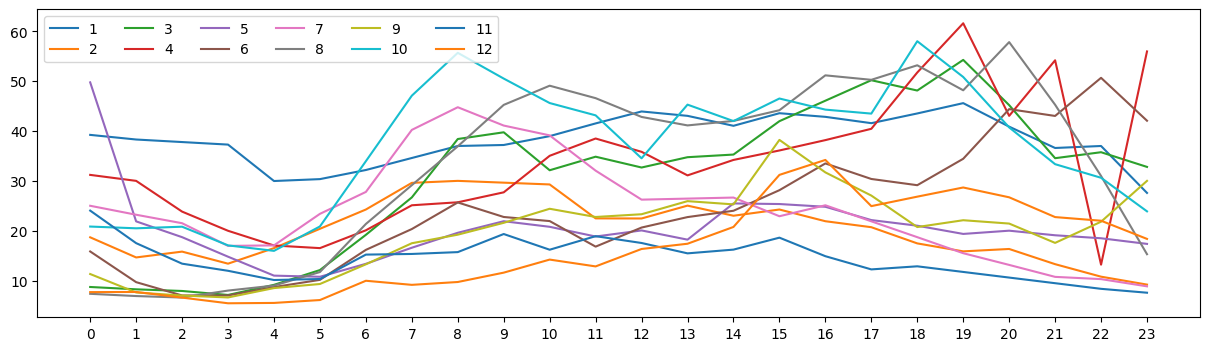

In [46]:
NO2_Location_A_noMV = air_df.NO2_Location_A.interpolate(method='linear')

month_poss = air_df.month.unique()
hour_poss = air_df.hour.unique()
plt.figure(figsize=(15,4))

for mn in month_poss:
    BM = (air_df.month == mn) & (air_df.day ==1)
    plt.plot(NO2_Location_A_noMV[BM].values,
             label=mn)
plt.legend(ncol=6)
plt.xticks(hour_poss)
plt.show()

## Example 3

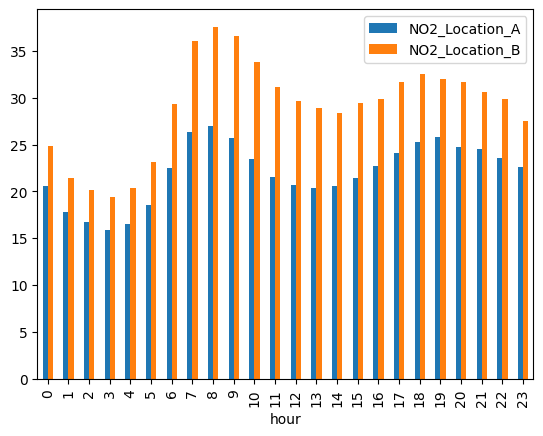

In [47]:
air_df.groupby('hour')[
    ['NO2_Location_A','NO2_Location_B']].mean().plot.bar()
plt.show()

## Example 4

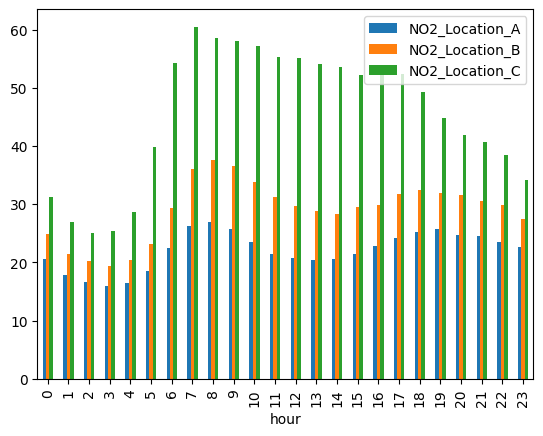

In [48]:
air_df.groupby('hour')[['NO2_Location_A','NO2_Location_B','NO2_Location_C']].mean().plot.bar()
plt.show()

## Example 5

In [49]:
patient_df = pd.read_csv('kidney_disease.csv')

In [50]:
print('Number of missing values:')
patient_df.isna().sum()

Number of missing values:


rc           131
sc            17
pcv           71
sg            47
hemo          52
diagnosis      0
dtype: int64

<Axes: >

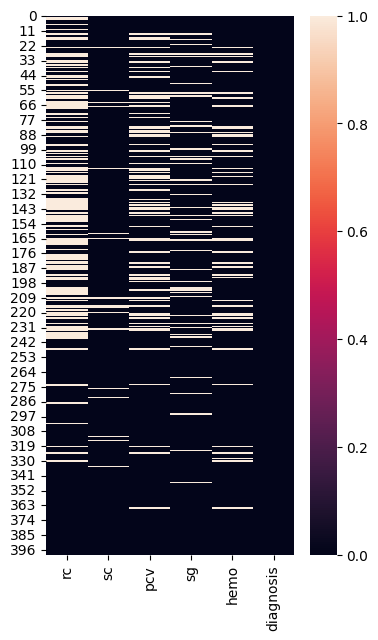

In [51]:
plt.figure(figsize=(4,7))
sns.heatmap(patient_df.isna())

Diagnosis Analysis for sc:


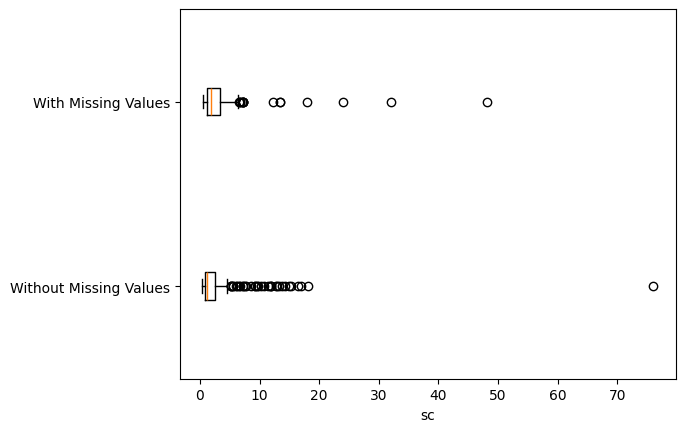

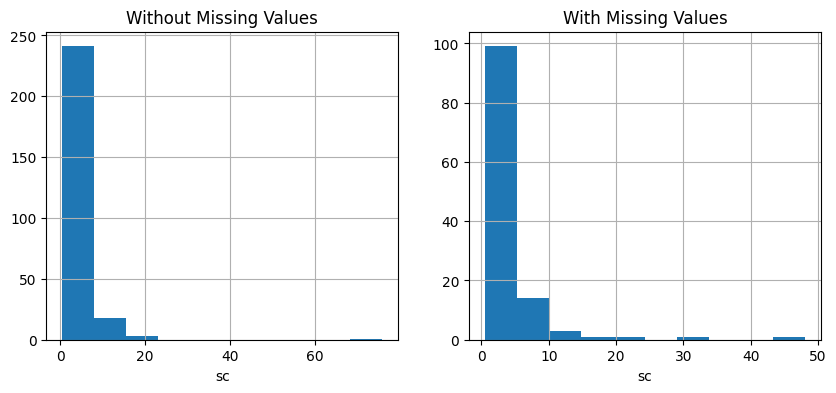

p-value of t-test: 0.18583257224831443
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


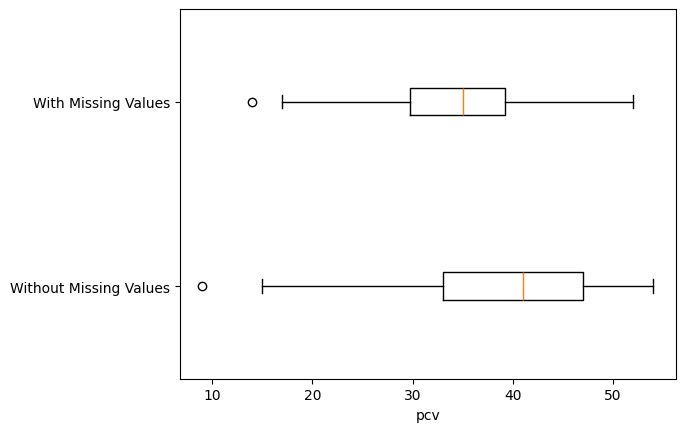

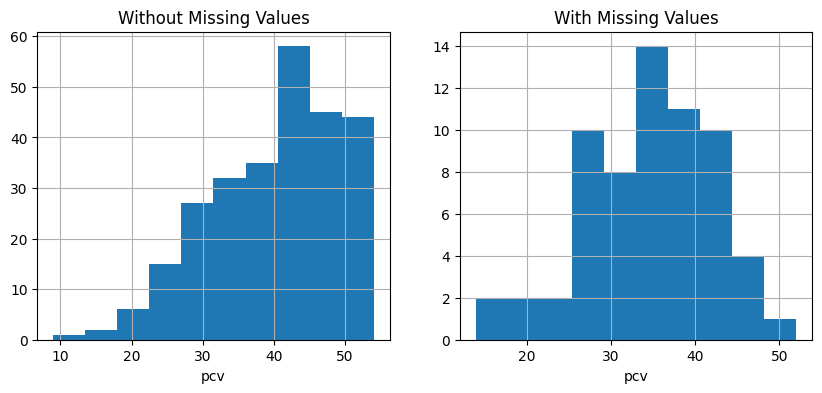

p-value of t-test: 1.552273251165168e-05
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


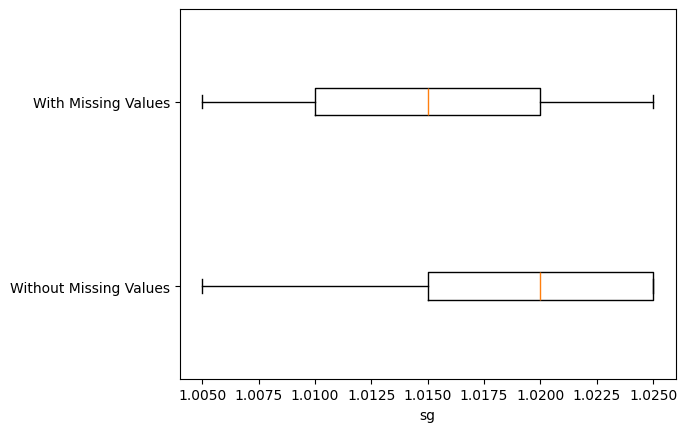

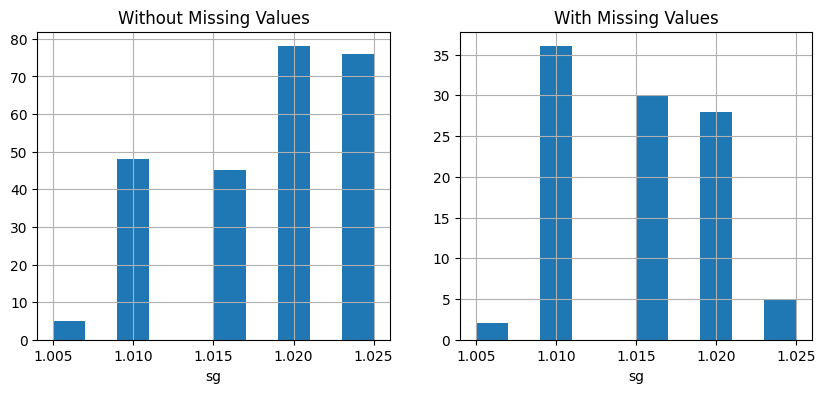

p-value of t-test: 1.0955628827436889e-07
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


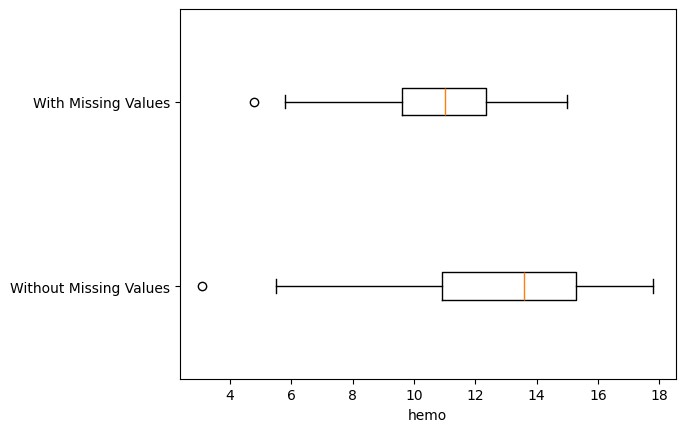

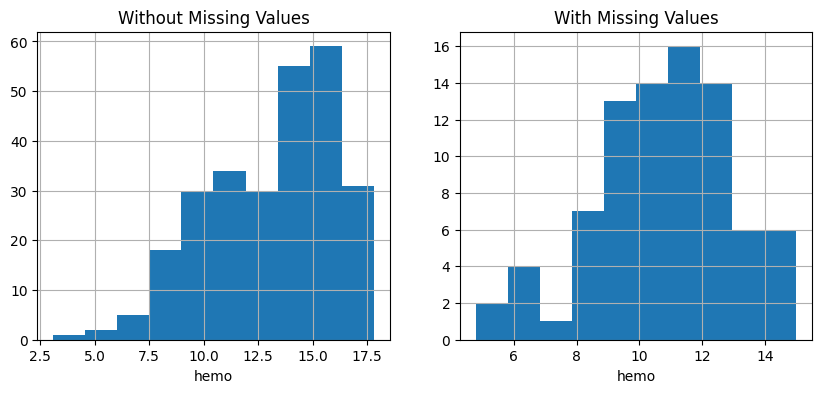

p-value of t-test: 2.9763626466020436e-10
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


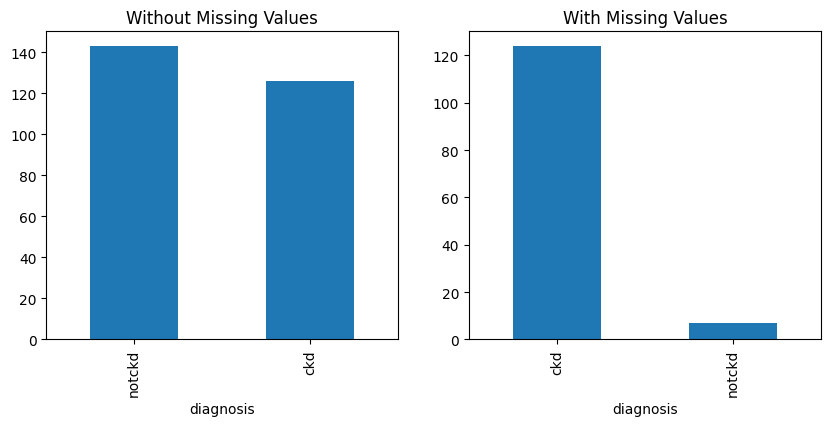

p-value of Chi_squared test: 5.168131718514657e-20
- - - - - - - - - divider - - - - - - - - - 


In [52]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['sc','pcv','sg','hemo']

BM_MV = patient_df.rc.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Diagnosis Analysis for rc:


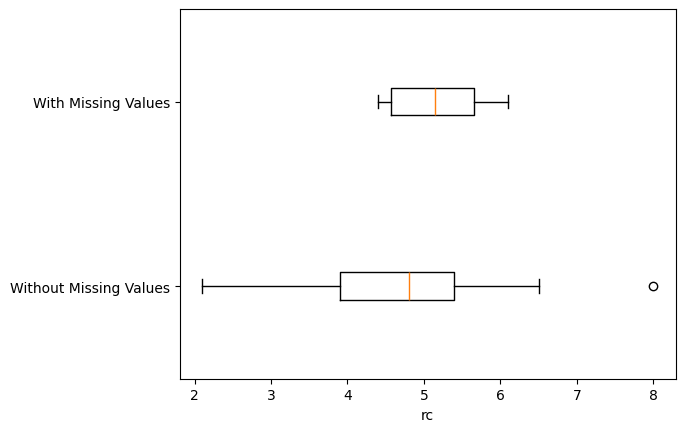

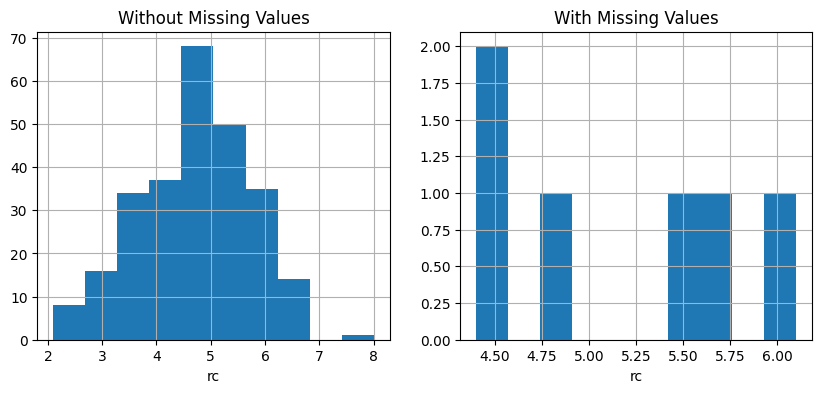

p-value of t-test: 0.2679867109793844
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


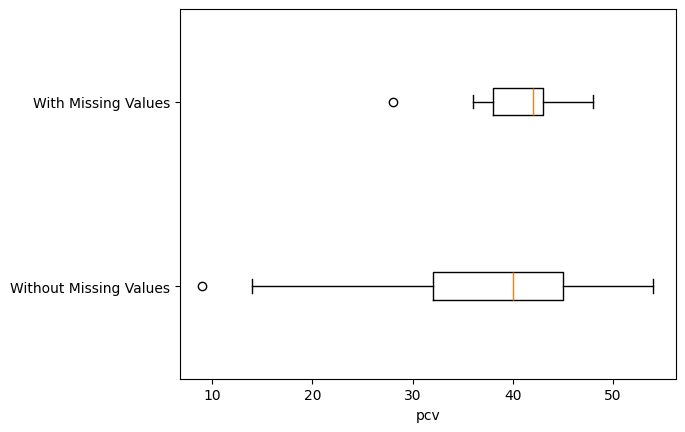

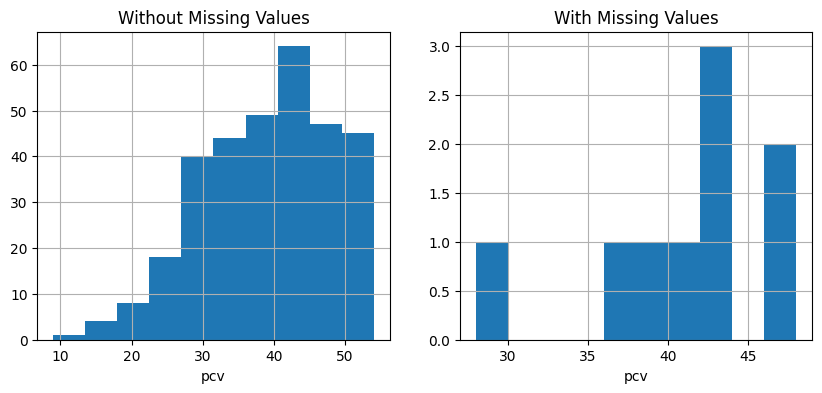

p-value of t-test: 0.5225987625338995
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


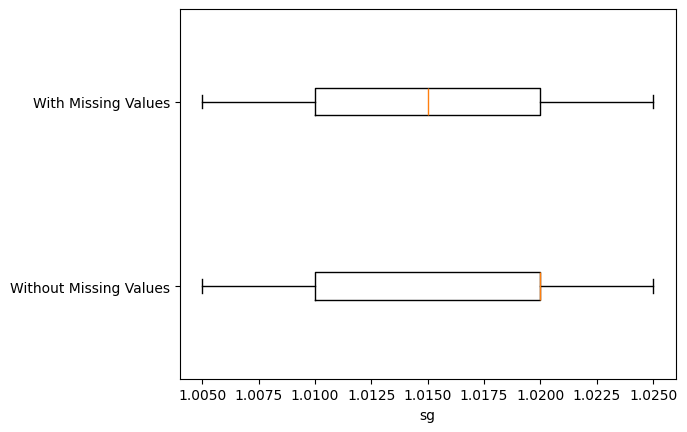

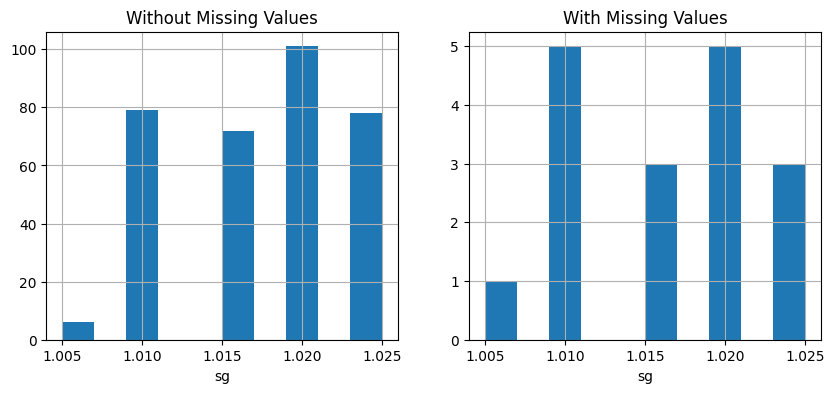

p-value of t-test: 0.36336243213485564
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


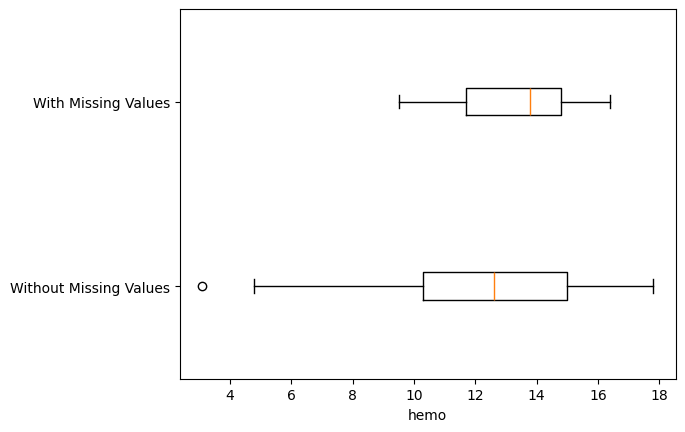

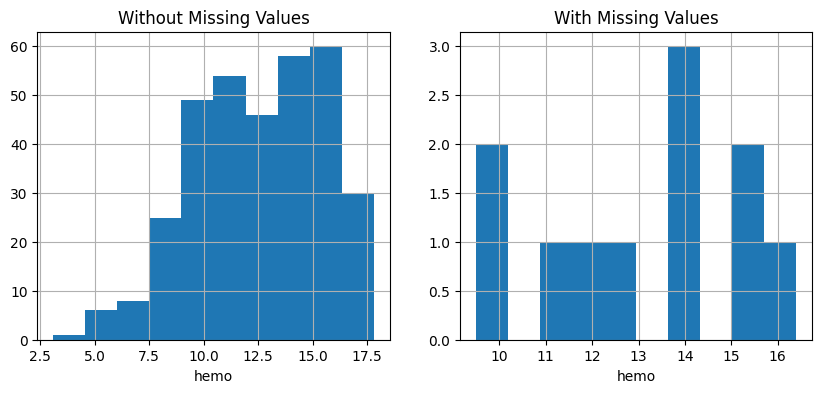

p-value of t-test: 0.4681304996025132
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


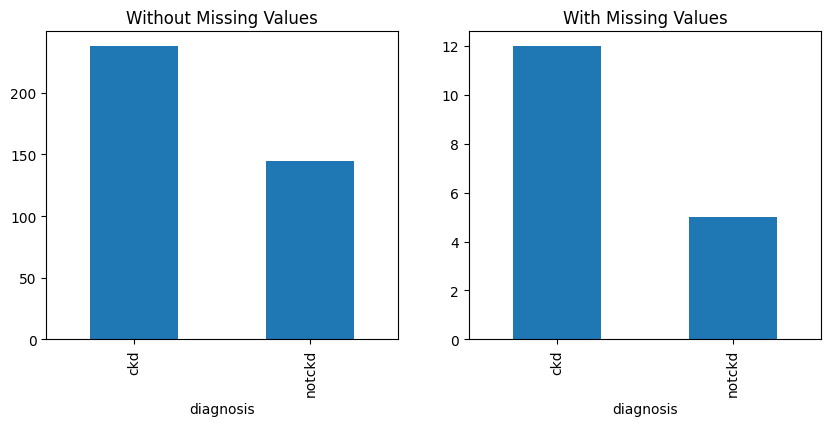

p-value of Chi_squared test: 0.6541676805409404
- - - - - - - - - divider - - - - - - - - - 


In [53]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','pcv','sg','hemo']

BM_MV = patient_df.sc.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Diagnosis Analysis for rc:


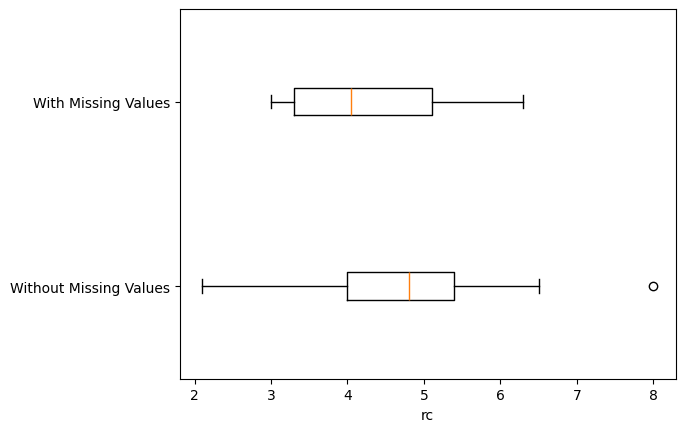

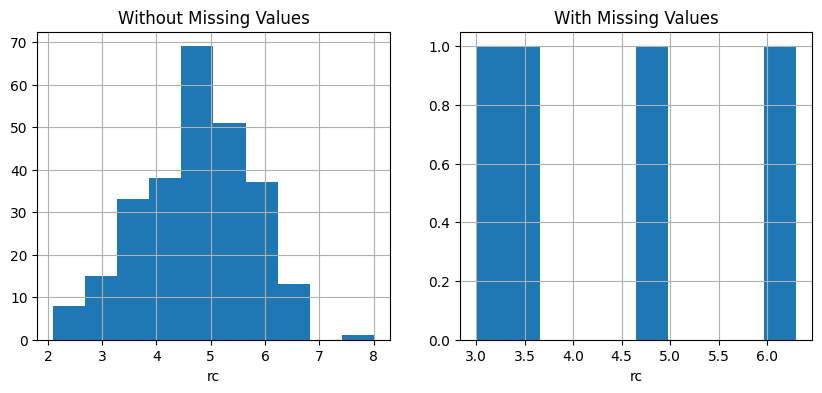

p-value of t-test: 0.4834207705489211
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sc:


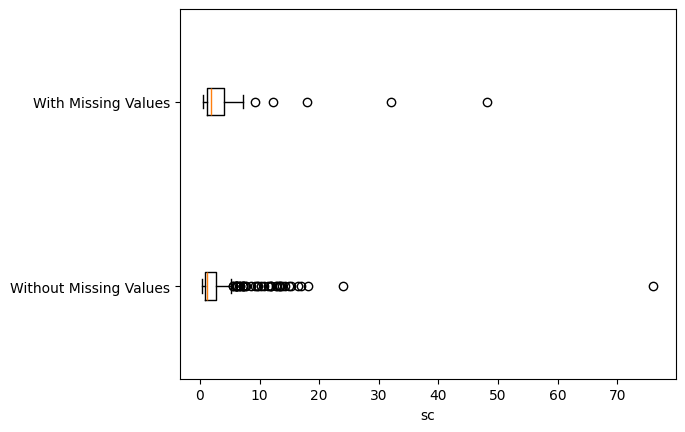

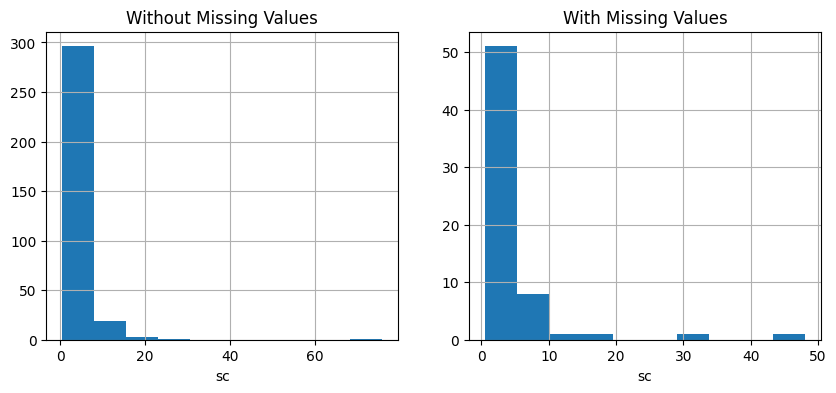

p-value of t-test: 0.09225178215961609
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


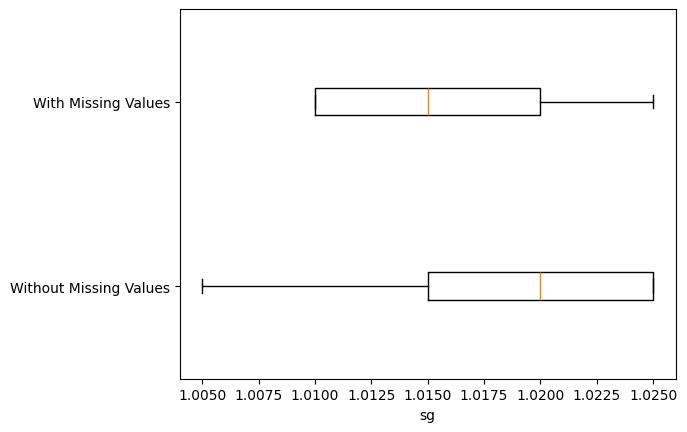

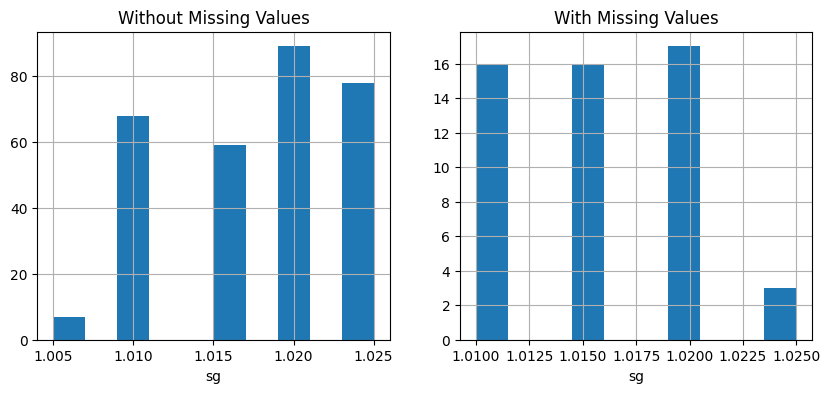

p-value of t-test: 0.01757923566523417
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


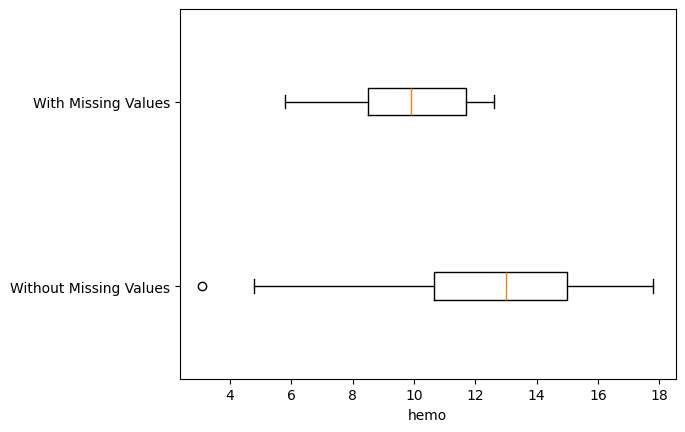

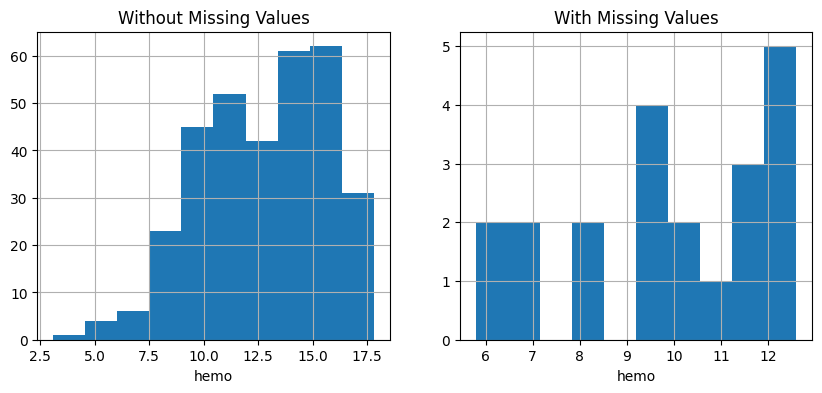

p-value of t-test: 1.5664018538667493e-05
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


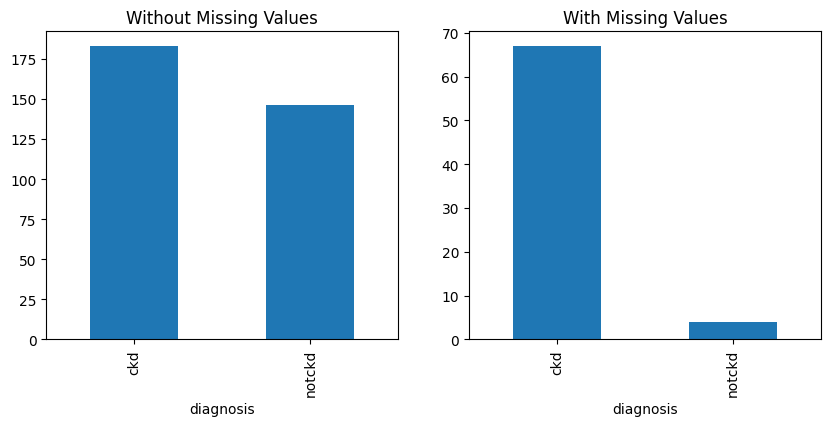

p-value of Chi_squared test: 2.2258514131489864e-09
- - - - - - - - - divider - - - - - - - - - 


In [54]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','sc','sg','hemo']

BM_MV = patient_df.pcv.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Diagnosis Analysis for rc:


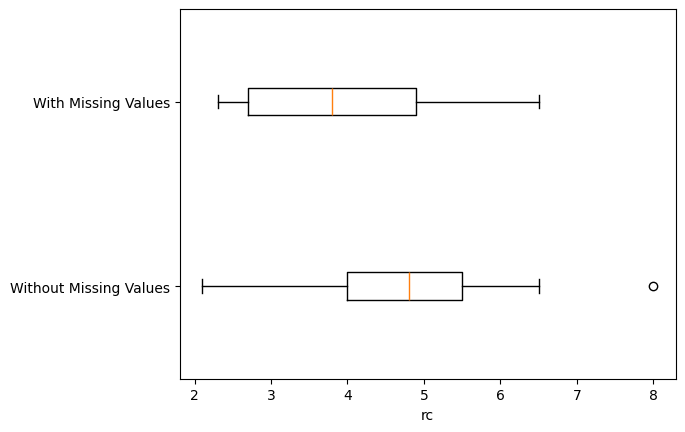

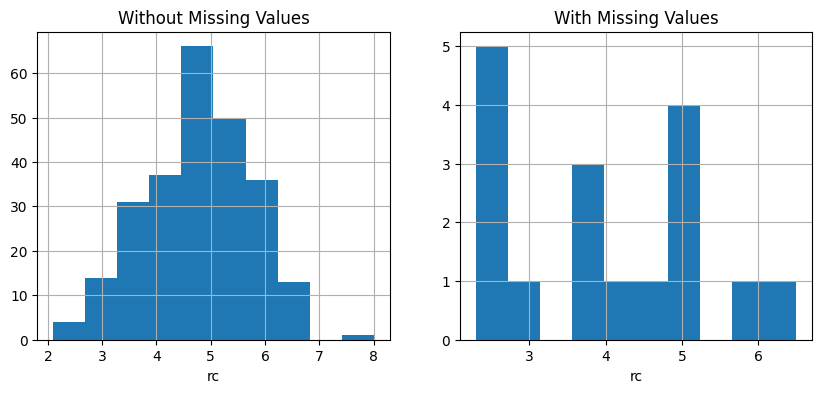

p-value of t-test: 0.00225068644343712
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sc:


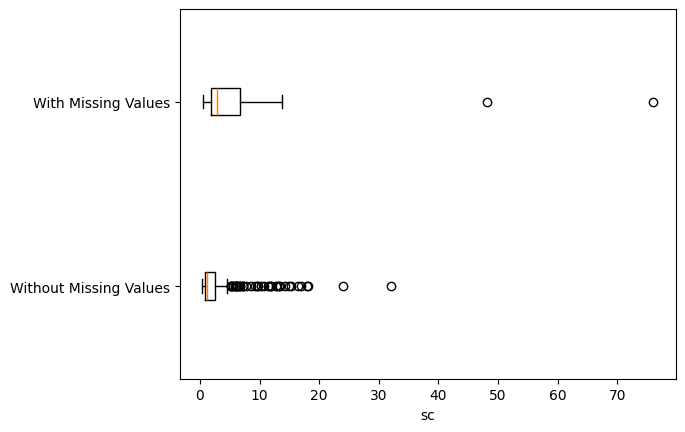

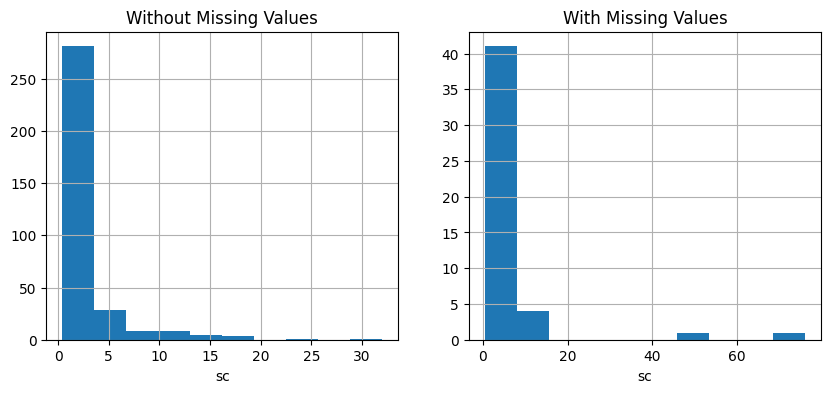

p-value of t-test: 7.153109526995942e-06
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


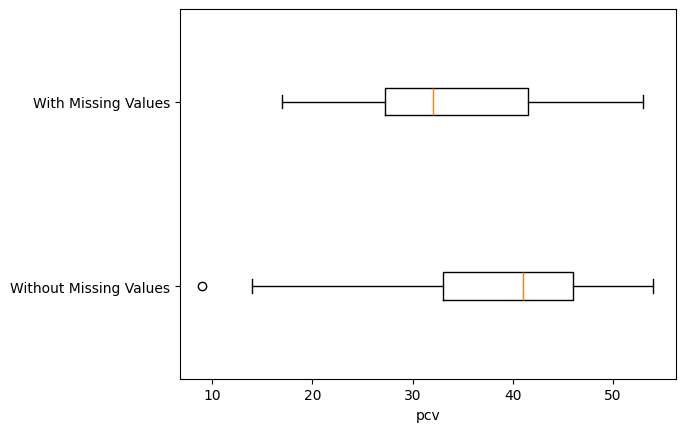

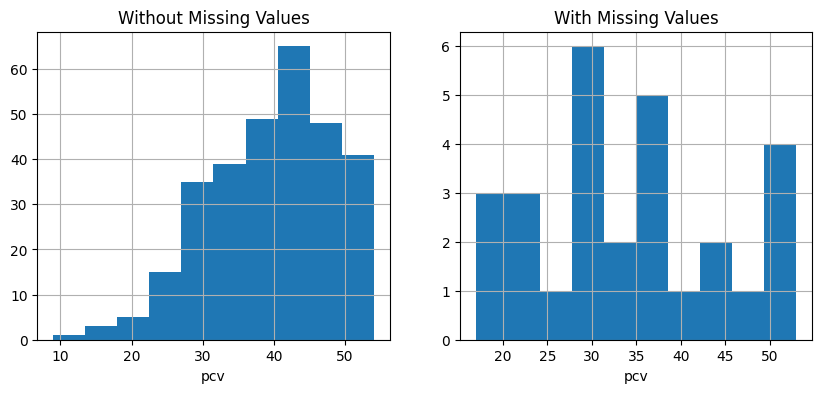

p-value of t-test: 0.0014894695918489607
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


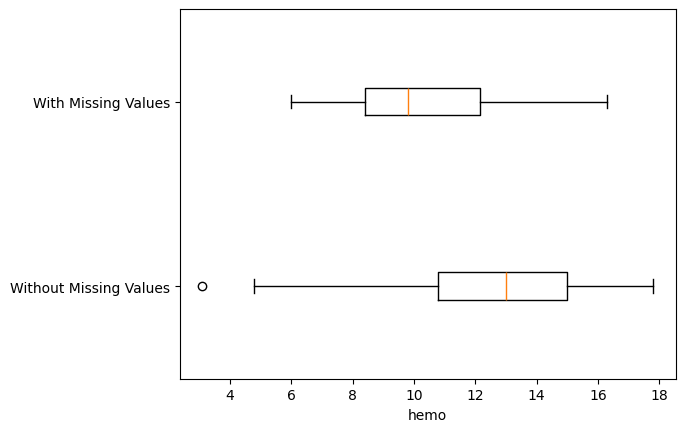

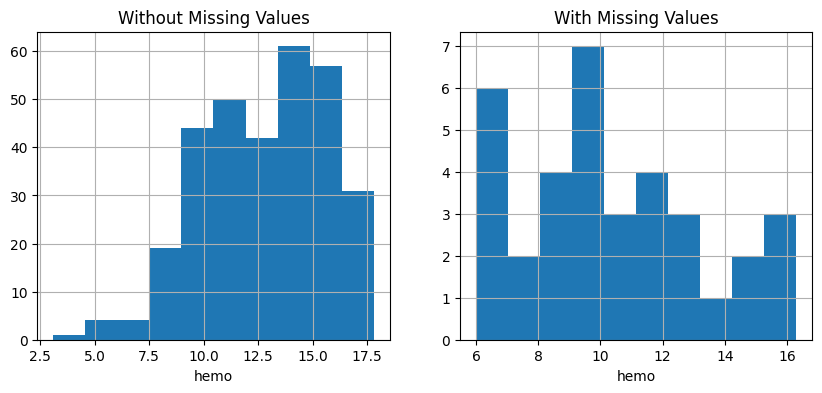

p-value of t-test: 2.7119421233597055e-06
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


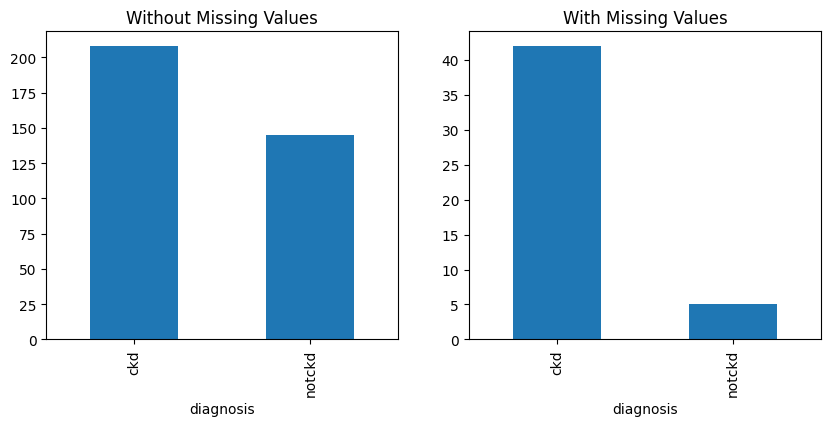

p-value of Chi_squared test: 0.00010072544367170718
- - - - - - - - - divider - - - - - - - - - 


In [55]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','sc','pcv','hemo']

BM_MV = patient_df.sg.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Diagnosis Analysis for rc:


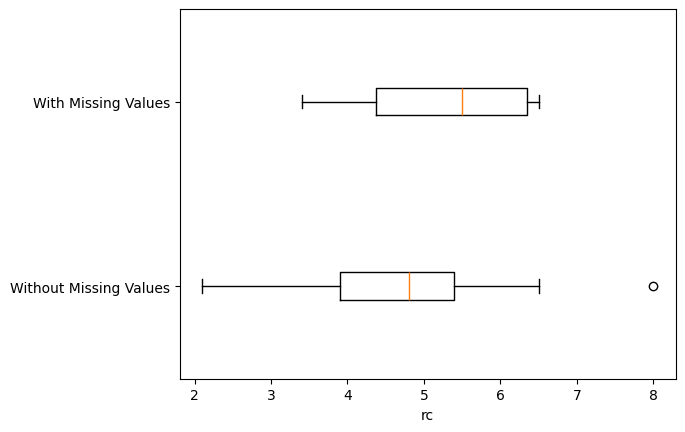

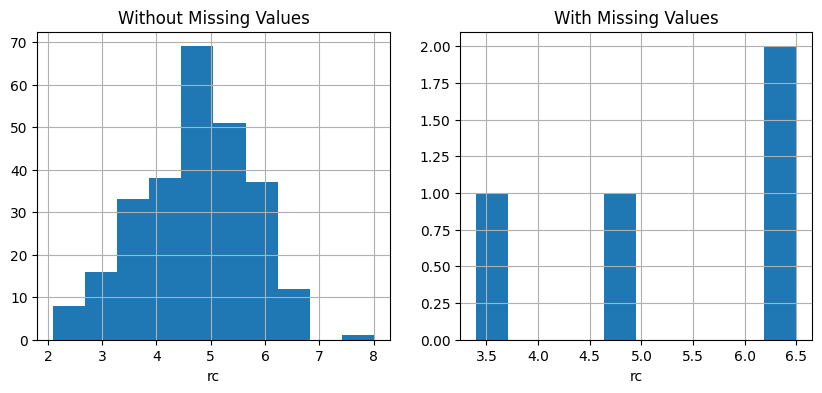

p-value of t-test: 0.30996898190520206
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sc:


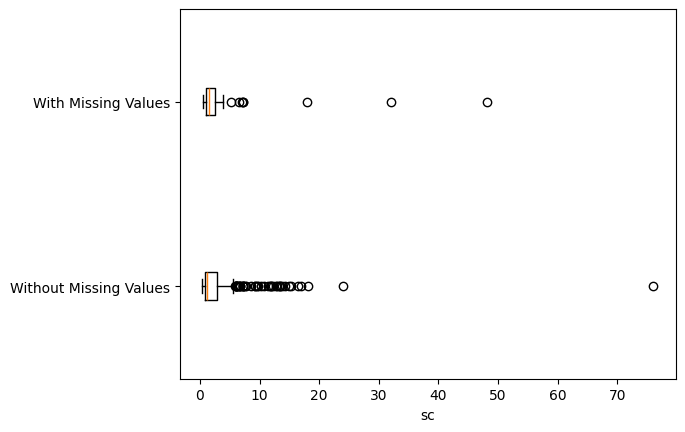

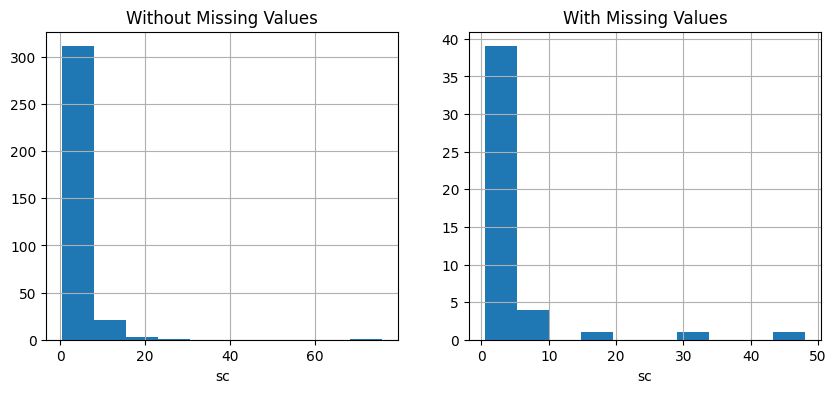

p-value of t-test: 0.17771862389361792
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


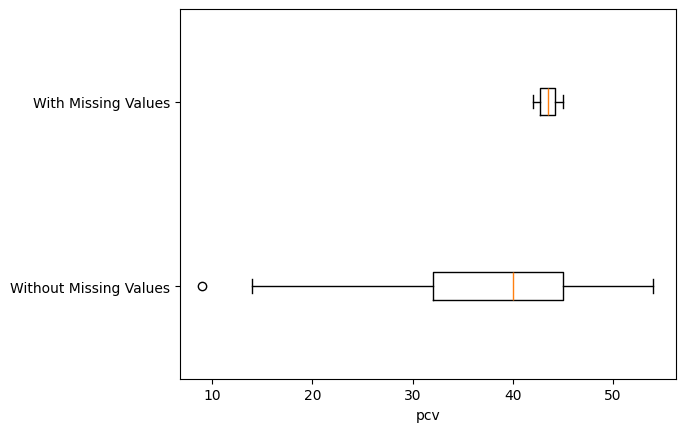

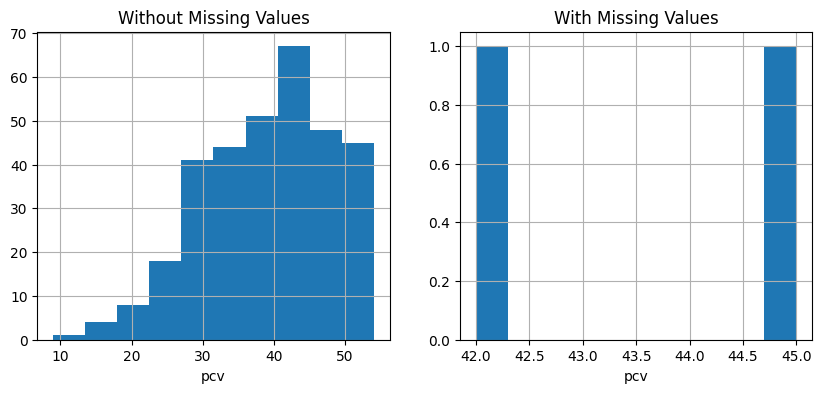

p-value of t-test: 0.46728803939148567
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


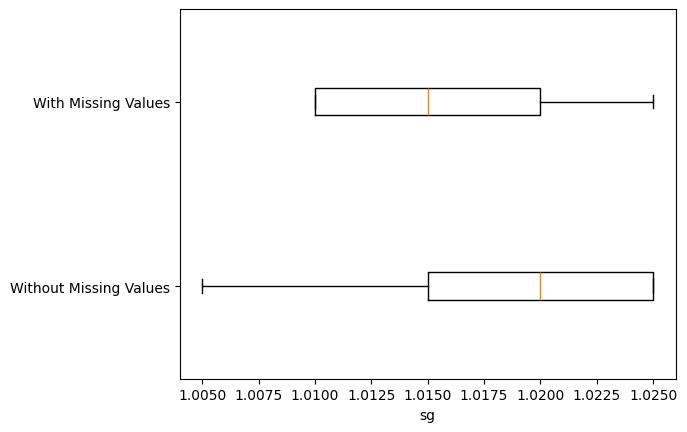

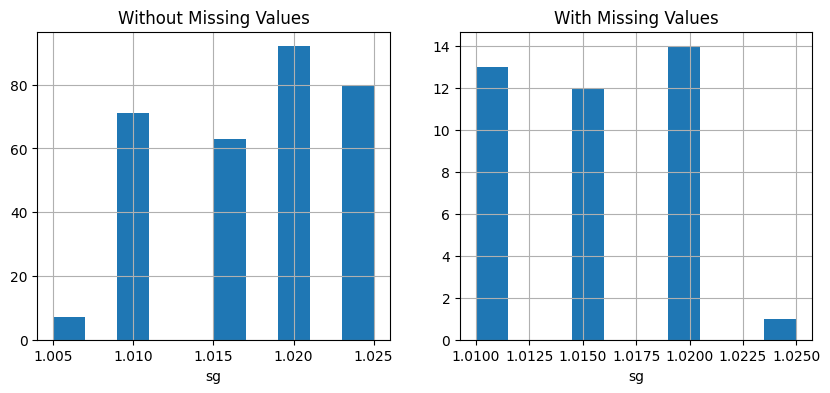

p-value of t-test: 0.016703395424493714
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


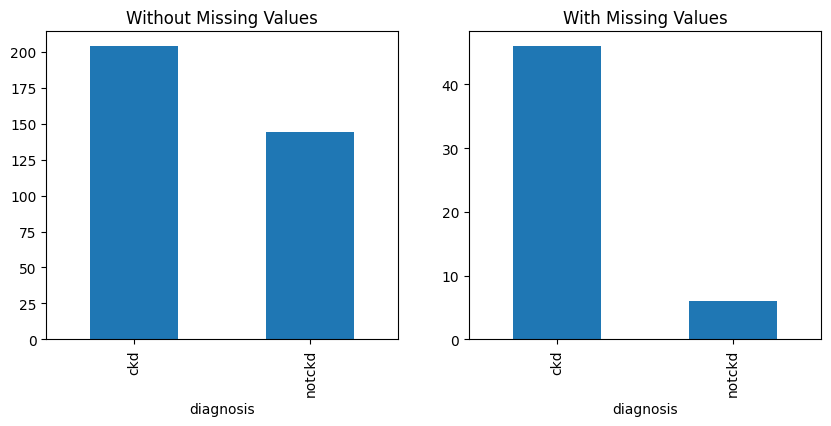

p-value of Chi_squared test: 6.542728784321527e-05
- - - - - - - - - divider - - - - - - - - - 


In [56]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','sc','pcv','sg']

BM_MV = patient_df.hemo.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

In [57]:
patient_df['rc_BMV'] = patient_df.rc.isna().astype(int)
patient_df['pcv_BMV'] = patient_df.pcv.isna().astype(int)
patient_df['sg_BMV'] = patient_df.sg.isna().astype(int)
patient_df['hemo_BMV'] = patient_df.hemo.isna().astype(int)

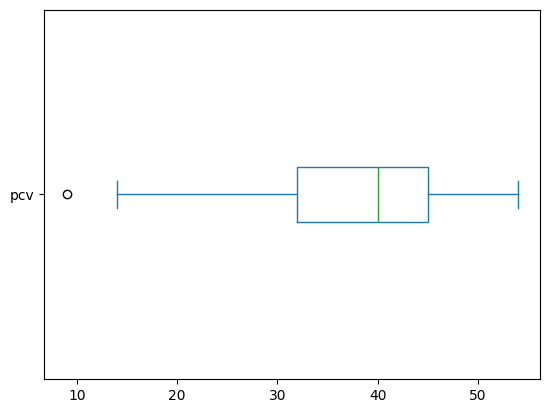

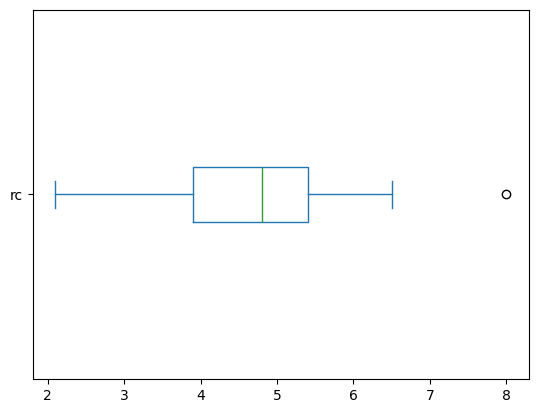

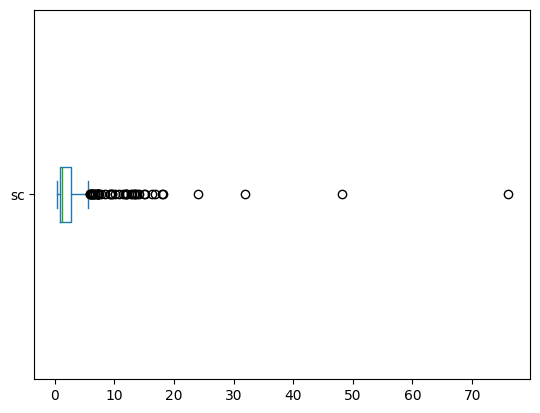

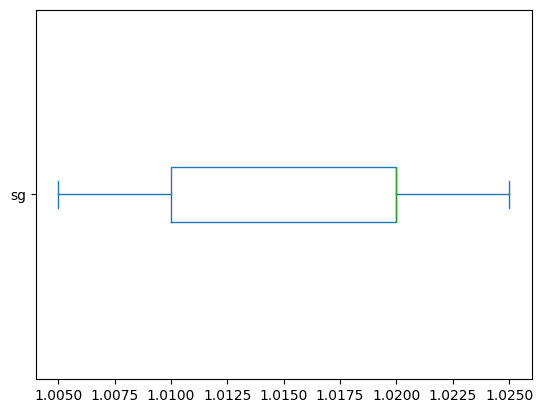

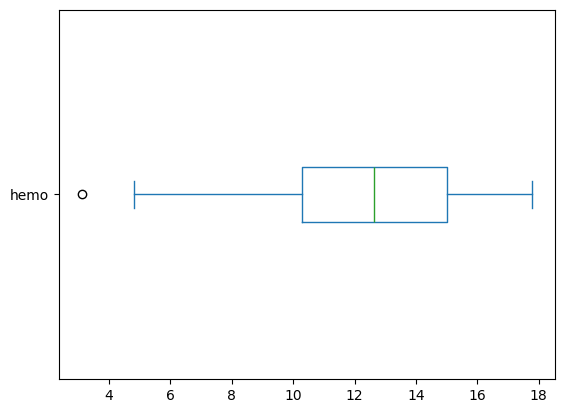

In [58]:
numerical_attributes = ['pcv','rc','sc','sg','hemo']
for att in numerical_attributes:
    patient_df[att].plot.box(vert=False)
    plt.show()

In [59]:
patient_df.sc.fillna(patient_df.sc.median(),inplace=True)
patient_df.fillna(patient_df.mean(),inplace=True)

TypeError: Could not convert ['ckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckdnotckd'] to numeric

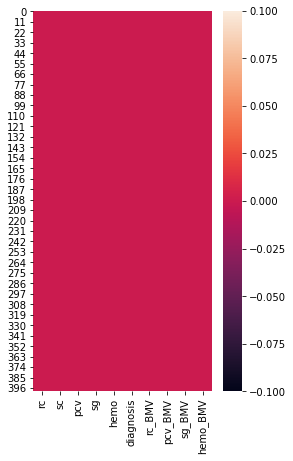

In [ ]:
plt.figure(figsize=(4,7))
sns.heatmap(patient_df.isna())